# Solve a constrained optimization problem with a Penalty Function

minimize $f=-x_1 x_2$  
subject to  
$g_1 = x_1 + x_2^2 - 1 \leq 0$  
$g_2 = -x_1 - x_2^2 \leq 0$

We transform the contrained problem into an unconstrained problem and then solve it with eg SGD

Penalty methods start with an initial point $\bf{x}$ and a small value for $\rho$. The unconstrained optimization problem is then solved. The resulting design point is then used as the starting point for another optimization with an increased penalty. We continue with this procedure until the resulting point is feasible or a mx number of iterations has been reached. Use quadratic penalties to produce a smooth objective function.

In [9]:
using PyPlot
using Optim

In [10]:
f(x) = -x[1]*x[2]
g1(x) = x[1] + x[2]^2 - 1
g2(x) = -x[1] - x[2]

g2 (generic function with 1 method)

In [11]:
function penaltyFunctionTrace(f, P, x0, r)
    T(x, r) = f(x) + r * P(x)
    x = x0
    trace = x
    for i = 1:length(r)
        result = optimize(x -> T(x, r[i]), x)
        show(result)
        x .= result.minimum
        println(x)
        trace = [trace x]
    end
    return trace
end

penaltyFunctionTrace (generic function with 1 method)

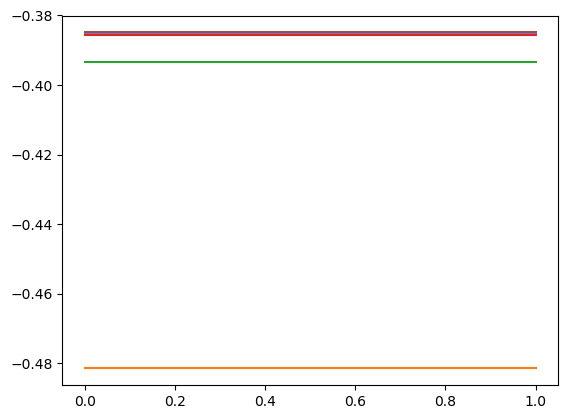

 * Status: success

 * Candidate solution
    Minimizer: [8.89e-01, 6.67e-01]
    Minimum:   -4.814815e-01

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [1.00e+00, 5.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    38
    f(x) calls:    77
[-0.481481, -0.481481]
 * Status: success

 * Candidate solution
    Minimizer: [6.86e-01, 5.86e-01]
    Minimum:   -3.933550e-01

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [-4.81e-01, -4.81e-01]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    36
    f(x) calls:    72
[-0.393355, -0.393355]
 * Status: success

 * Candidate solution
    Minimizer: [6.69e-01, 5.78e-01]
    Minimum:   -3.857347e-01

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [-3.93e-01, -3.93e-01]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work co

2×6 Array{Float64,2}:
 -0.481481  -0.481481  -0.393355  -0.385735  -0.384984  -0.384909
 -0.481481  -0.481481  -0.393355  -0.385735  -0.384984  -0.384909

In [12]:
P(x) = max(0, g1(x))^2 + max(0, g2(x))^2
trace = penaltyFunctionTrace(f, P, [1., 5.], [1, 10, 100, 1e3, 1e4])
plot(trace)
trace


Can not always ensure feasibility

# Solve a constrained optimization problem with Interior Point Methods

Ensure that the search point always remain feasible  
minimize $f(x)+ p_{barrier}(\bf{x})/\rho$

barrier approaches infinity as one approaches a constraint boundary (ie as one approaches infeasibility)    
when $\rho$ is increased, the penalty for approaching the boundary decreases  
The inerior point method requires a feasible point from which to start the search  
Start with $\min p_{quadratic}(\bf{x})$

In [13]:
function interiorPointMethod(f, P, x; ρ=1, γ=2, ϵ=0.001)
    delta = Inf
    while delta > ϵ
        xp = minimize(x -> f(x) + p(x)/ρ, x)
        delta = norm(xp-x)
        x = xp
        ρ *= γ
    end
    return x
end

interiorPointMethod (generic function with 1 method)